In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import math

c:\deeplearning\python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
print("size of : ")
print("-training_set: \t\t{}".format(len(data.train.labels)))
print("-test_set: \t\t{}".format(len(data.test.labels)))
print("-validation-set: \t{}".format(len(data.validation.labels)))

size of : 
-training_set: 		55000
-test_set: 		10000
-validation-set: 	5000


In [4]:
data.test.cls = np.argmax(data.test.labels, axis=1)

In [5]:
#we know that MNIST images are 28 pixels in each dimension
img_size = 28

#image are stored in one_dimensional arrays of this length
img_size_flat = img_size * img_size

#Tuple with height and width if images used to reshape arrays
img_shape = (img_size, img_size)

#number of colour channels for the images: 1 channel for gray-scale
num_channels = 1

#number of classes, 
num_classes = 10

In [6]:
#Function used to plot 9 images in a 3x3 grid, and writing the true and predicted classes below each image
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    #Create figure with  3X3 sub_plots
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        
        #Plot images
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        
        if cls_pred is None:
            xlabel = "True:{0}".format(cls_true[i])
        else:
            xlabel = "True:{0}, Pred:{1}".format(cls_true[i], cls_pred[i])
            
        #Show the classes as the label on the x-axis
        ax.set_xlabel([xlabel])
        
        #Remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])
        
    #Ensure the plot is show correctly with multiple plots
    #in a single Notebook cell
    plt.show()
        

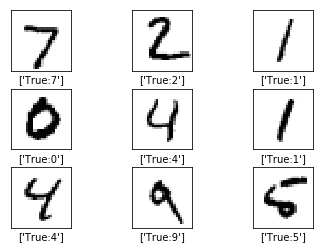

In [7]:
#Get the first images from the test-set.
images = data.test.images[0:9]

#Get the true classes for those images
cls_true = data.test.cls[0:9]

#Plot the image and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)


In [8]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

In [9]:
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

In [10]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

In [11]:
y_true_cls = tf.argmax(y_true, axis=1)

In [12]:
if False:
    x_pretty = pt.wrap(x_image)
    
    with pt.defaults_scope(activation_fn=tf.nn.relu):
        y_pred, loss = x_pretty.\
        conv2d(kernel=5, depth=16, name='layer_conv1').\
        max_pool(kernel=2, stride=2).\
        conv2d(kernel=5, depth=36, name='layer_conv2').\
        max_pool(kernel=2, stride=2).\
        flatten().\
        fully_connected(size=128, name='layer_fc1').\
        softmax_classifier(num_classes=num_classes, labels=y_true)

In [13]:
net = x_image

In [14]:
net = tf.layers.conv2d(inputs=net, name='layer_conv1', padding='same', filters=16, kernel_size=5, activation=tf.nn.relu)

In [15]:
layer_conv1 = net

In [16]:
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

In [17]:
net = tf.layers.conv2d(inputs=net, name='layer_conv2', padding='same', filters=36, kernel_size=5, activation=tf.nn.relu)

In [18]:
layer_conv2 = net

In [19]:
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

In [20]:
net

<tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 7, 7, 36) dtype=float32>

In [21]:
net = tf.contrib.layers.flatten(net)

In [22]:
net

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 1764) dtype=float32>

In [23]:
net = tf.layers.dense(inputs=net, name='layer_fc1', units=num_classes, activation=tf.nn.relu)

In [24]:
logits = net

In [25]:
y_pred = tf.nn.softmax(logits=logits)

In [26]:
y_pred_cls = tf.argmax(y_pred, axis=1)

In [27]:
#Loss-Function to be Optimized
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=logits)

In [28]:
loss = tf.reduce_mean(cross_entropy)

In [29]:
#Optimization Method
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(loss)

In [30]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [31]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [32]:
#Getting the weigths, plot the weights of the convolutional layers.
for var in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES):
    print(var)

<tf.Variable 'layer_conv1/kernel:0' shape=(5, 5, 1, 16) dtype=float32_ref>
<tf.Variable 'layer_conv1/bias:0' shape=(16,) dtype=float32_ref>
<tf.Variable 'layer_conv2/kernel:0' shape=(5, 5, 16, 36) dtype=float32_ref>
<tf.Variable 'layer_conv2/bias:0' shape=(36,) dtype=float32_ref>
<tf.Variable 'layer_fc1/kernel:0' shape=(1764, 10) dtype=float32_ref>
<tf.Variable 'layer_fc1/bias:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>
<tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>
<tf.Variable 'layer_conv1/kernel/Adam:0' shape=(5, 5, 1, 16) dtype=float32_ref>
<tf.Variable 'layer_conv1/kernel/Adam_1:0' shape=(5, 5, 1, 16) dtype=float32_ref>
<tf.Variable 'layer_conv1/bias/Adam:0' shape=(16,) dtype=float32_ref>
<tf.Variable 'layer_conv1/bias/Adam_1:0' shape=(16,) dtype=float32_ref>
<tf.Variable 'layer_conv2/kernel/Adam:0' shape=(5, 5, 16, 36) dtype=float32_ref>
<tf.Variable 'layer_conv2/kernel/Adam_1:0' shape=(5, 5, 16, 36) dtype=float32_ref>
<tf.

In [33]:
def get_weights_variable(layer_name):
    # Retrieve an existing variable named 'kernel' in the scope
    # with the given layer_name.
    # This is awkward because the TensorFlow function was
    # really intended for another purpose.
    
    with tf.variable_scope(layer_name, reuse=True):
        variable = tf.get_variable('kernel')
        
        return variable

In [34]:
weights_conv1 = get_weights_variable(layer_name='layer_conv1')
weights_conv2 = get_weights_variable(layer_name='layer_conv2')

In [35]:
session = tf.Session()

In [36]:
session.run(tf.global_variables_initializer())

In [37]:
train_batch_size = 64

In [38]:
#Counter for total number of iterations performed so far.
total_iterations = 0

def optimize(num_iterations):
    
    #Ensure we update the global variable rather than a local copy
    global total_iterations
    
    for i in range(total_iterations, total_iterations + num_iterations):
        
        #Get a batch of training examples.
        #x_batch now holds a batch of images and y_true_batch are the true albels for those images
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)
        
        # Put the batch into a dict with the proper names for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x:x_batch, y_true:y_true_batch}
        
        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)
        
        #print status every 100 iterations.
        if i % 100 == 0:
            #Calculate the accuracy on the trainin-set
            acc = session.run(accuracy, feed_dict=feed_dict_train)
            
            #Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"
            
            print(msg.format(i + 1, acc))
    #Update the total number of iterations performed.
    total_iterations += num_iterations

In [39]:
#Function for plotting examples of images from the test-set that have been mis-classified.
def plot_example_errors(cls_pred, correct):
    #This function is called from print_test_accuracy() below.
    
    # cls_pred is an array of the predicted class-number for all images in the test-set.

    # correct is a boolean array whether the predicted class is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    #Get the images from the test-set that have been incorrectly classified
    images = data.test.images[incorrect]
    
    #Get the predicted classes for those images
    cls_pred = cls_pred[incorrect]
    
    #Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    #plot the first 9 images
    plot_images(images=images[0:9],
              cls_true=cls_true[0:9],
              cls_pred=cls_pred[0:9])
    


In [40]:
#Helper-function to plot confusion matrix
def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    #Get the confusion matrix using sklearn
    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    
    #Print the confusion matrix as text.
    print(cm)
    
    #Plot the confusion matrix as an image.
    plt.matshow(cm)
    
    #Make various adjustments to the plots.
    plt.colorbar() 
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    #Ensure the plot is shown correctly with multiple plots in a single Notebook cell.
    plt.show()

In [41]:
#Helper-function for showing the performance
test_batch_size = 256
def print_test_accuracy(show_example_errors=False, show_confusion_matrix=False):
    
    #Number of images in the test-set.
    num_test = len(data.test.images)
    
    #Allocate an array for the predicted classes which will be calculated in batches and filled into this array
    cls_pred = np.zeros(shape=num_test, dtype=np.int)
    
    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0
    while i < num_test:
        #The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)
        
        #Get the images from the test-set between index i and j.
        images = data.test.images[i:j, :]
        
        #Get the associated labels.
        labels = data.test.labels[i:j, :]
        
        #Create a feed-dict with these images and labels
        feed_dict = {x:images, y_true:labels}
        
        #Calculate the predicted class using Tensorflow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)
        
        #Set the start-index for the next batch to the end-index of current batch.
        i = j
    
    #Convenience variable for the true class-numbers of the test-set
    cls_true = data.test.cls
    
    #Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)
    
    #Calculate the number of correctly classified images.
    #When summing a boolean array, False means o and True means 1.
    correct_sum = correct.sum()
    
    #Classification accuracy is the number of correctly classified images divided by the total number of images in the test-set
    acc = float(correct_sum) / num_test
    
    #Print the accuracy.
    msg = "Accuracy on Test-set: {0:.1%}({1}/{2})"
    print(msg.format(acc, correct_sum, num_test))
    
    #plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)
        
    #Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)
      

In [42]:
#Performance before any optimization
print_test_accuracy()

Accuracy on Test-set: 5.8%(582/10000)


In [43]:
#Performance after 1 optimization iteration
optimize(num_iterations=1)

Optimization Iteration:      1, Training Accuracy:  32.8%


In [44]:
print_test_accuracy()

Accuracy on Test-set: 17.9%(1789/10000)


In [45]:
%%time
optimize(num_iterations=99)

Wall time: 3.55 s


Accuracy on Test-set: 55.9%(5593/10000)
Example errors:


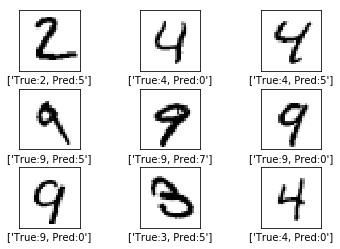

In [46]:
print_test_accuracy(show_example_errors=True)

In [47]:
%%time
optimize(num_iterations=900)

Optimization Iteration:    101, Training Accuracy:  50.0%
Optimization Iteration:    201, Training Accuracy:  64.1%
Optimization Iteration:    301, Training Accuracy:  54.7%
Optimization Iteration:    401, Training Accuracy:  51.6%
Optimization Iteration:    501, Training Accuracy:  62.5%
Optimization Iteration:    601, Training Accuracy:  50.0%
Optimization Iteration:    701, Training Accuracy:  54.7%
Optimization Iteration:    801, Training Accuracy:  56.2%
Optimization Iteration:    901, Training Accuracy:  67.2%
Wall time: 32.2 s


Accuracy on Test-set: 58.9%(5890/10000)
Example errors:


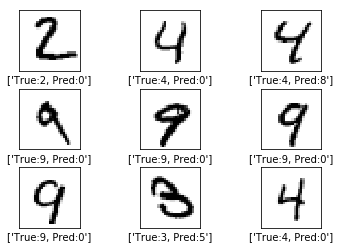

In [48]:
print_test_accuracy(show_example_errors=True)

In [49]:
%%time
optimize(num_iterations=9000)

Optimization Iteration:   1001, Training Accuracy:  59.4%
Optimization Iteration:   1101, Training Accuracy:  68.8%
Optimization Iteration:   1201, Training Accuracy:  59.4%
Optimization Iteration:   1301, Training Accuracy:  60.9%
Optimization Iteration:   1401, Training Accuracy:  54.7%
Optimization Iteration:   1501, Training Accuracy:  60.9%
Optimization Iteration:   1601, Training Accuracy:  59.4%
Optimization Iteration:   1701, Training Accuracy:  65.6%
Optimization Iteration:   1801, Training Accuracy:  62.5%
Optimization Iteration:   1901, Training Accuracy:  67.2%
Optimization Iteration:   2001, Training Accuracy:  65.6%
Optimization Iteration:   2101, Training Accuracy:  59.4%
Optimization Iteration:   2201, Training Accuracy:  50.0%
Optimization Iteration:   2301, Training Accuracy:  56.2%
Optimization Iteration:   2401, Training Accuracy:  60.9%
Optimization Iteration:   2501, Training Accuracy:  71.9%
Optimization Iteration:   2601, Training Accuracy:  71.9%
Optimization I

Accuracy on Test-set: 68.8%(6883/10000)
Example errors:


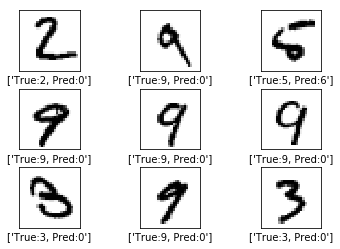

Confusion Matrix:
[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1133    0    0    1    0    1    0    0    0]
 [1008    7    0    0    6    0    1    7    3    0]
 [1005    0    0    0    0    3    0    2    0    0]
 [   1    0    0    0  981    0    0    0    0    0]
 [   8    1    0    0    0  877    4    1    1    0]
 [   4    2    0    0    2    0  949    0    1    0]
 [   6   10    0    0    0    0    0 1011    1    0]
 [   9    0    0    0    4    2    3    1  955    0]
 [ 940    5    0    0   45    5    0    5    9    0]]


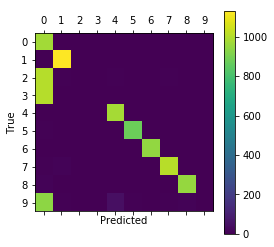

In [50]:
print_test_accuracy(show_example_errors=True, show_confusion_matrix=True)

In [57]:
#Visulization of weights and layers
#Helper-function for plotting convolutional weights
def plot_conv_weights(weights, input_channel=0):
    #Assume weights are TensorFlow ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.
    
    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    w = session.run(weights)

    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show() 

In [58]:
#Helper-function for plotting the output of a convolutional layer
def plot_conv_layer(layer, image):
    # Assume layer is a TensorFlow op that outputs a 4-dim tensor
    # which is the output of a convolutional layer,
    # e.g. layer_conv1 or layer_conv2.

    # Create a feed-dict containing just one image.
    # Note that we don't need to feed y_true because it is
    # not used in this calculation.
    feed_dict = {x:[image]}
    
    # Calculate and retrieve the output values of the layer
    # when inputting that image.
    values = session.run(layer, feed_dict=feed_dict)
    
    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]
    
    #Number of grids to plot.
    #Round-up, square-root of the filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    
    #Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)
    
    #Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [59]:
#Plot an image.
def plot_image(image):
    plt.imshow(image.reshape(img_shape), interpolation='nearest', cmap='binary')
    
    plt.show()

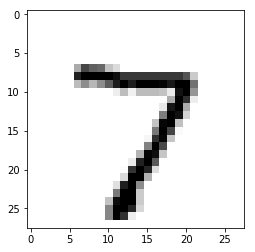

In [60]:
image1= data.test.images[0]
plot_image(image1)

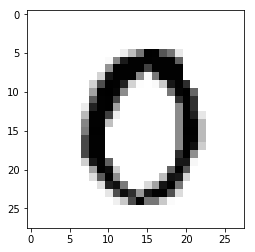

In [61]:
image2 = data.test.images[13]
plot_image(image2)

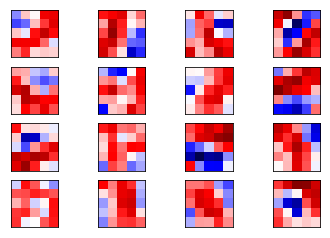

In [62]:
plot_conv_weights(weights=weights_conv1)

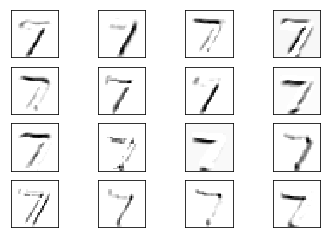

In [63]:
plot_conv_layer(layer=layer_conv1, image=image1)

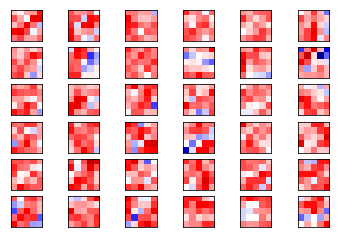

In [65]:
plot_conv_weights(weights=weights_conv2, input_channel=0)

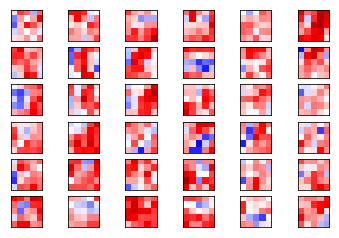

In [66]:
plot_conv_weights(weights=weights_conv2, input_channel=1)

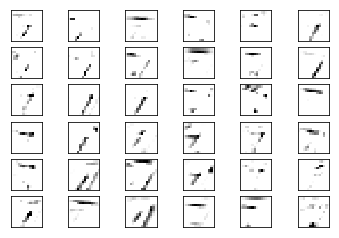

In [67]:
plot_conv_layer(layer=layer_conv2, image=image1)

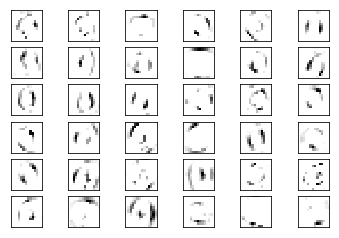

In [68]:
plot_conv_layer(layer=layer_conv2, image=image2)

In [69]:
session.close()